In [6]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [9]:
# ARIMA_model.py
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Đọc dữ liệu
train_df = pd.read_csv("../Dataset/712/train.csv")
test_df = pd.read_csv("../Dataset/712/test.csv")

In [11]:
# Chuyển đổi cột thời gian
train_df['InvoiceDate'] = pd.to_datetime(train_df['InvoiceDate'])
test_df['InvoiceDate'] = pd.to_datetime(test_df['InvoiceDate'])

# Gộp tổng doanh thu mỗi giờ làm chuỗi thời gian
train_df['Revenue'] = train_df['Quantity'] * train_df['UnitPrice'] * (1 - train_df['Discount'])
test_df['Revenue'] = test_df['Quantity'] * test_df['UnitPrice'] * (1 - test_df['Discount'])

train_series = train_df.set_index('InvoiceDate')['Revenue'].resample('h').sum().fillna(0)
test_series = test_df.set_index('InvoiceDate')['Revenue'].resample('h').sum().fillna(0)

# Xây dựng và huấn luyện mô hình ARIMA
model_arima = ARIMA(train_series, order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Dự đoán trên tập test
y_pred = model_arima_fit.forecast(steps=len(test_series))

# Đánh giá
mae = mean_absolute_error(test_series, y_pred)
rmse = np.sqrt(mean_squared_error(test_series, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 714.63, RMSE: 856.75


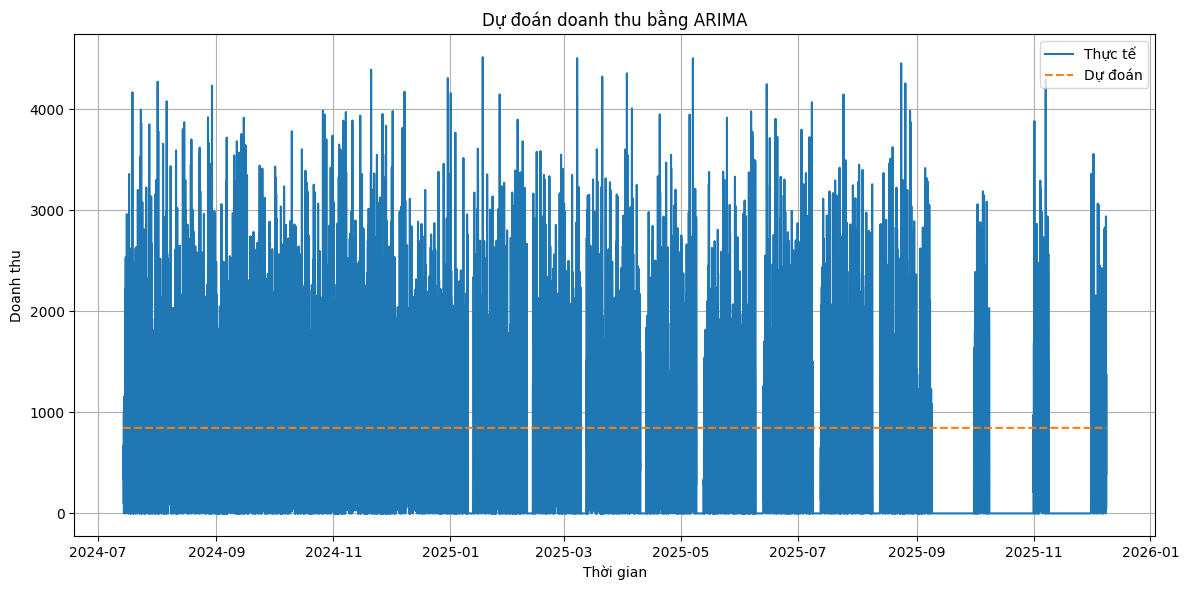

In [12]:
# Trực quan hoá kết quả
plt.figure(figsize=(12,6))
plt.plot(test_series.index, test_series.values, label='Thực tế')
plt.plot(test_series.index, y_pred, label='Dự đoán', linestyle='--')
plt.title('Dự đoán doanh thu bằng ARIMA')
plt.xlabel('Thời gian')
plt.ylabel('Doanh thu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()